# Regressão Linear - Predição da Idade

### importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### ler train.csv e test.csv

In [2]:
train = pd.read_csv('titanic/train.csv')

In [3]:
test = pd.read_csv('titanic/test.csv')

### transformar definir o Id do Passageiro como Index

In [7]:
train.set_index('PassengerId',inplace=True)

In [8]:
test.set_index('PassengerId',inplace=True)

### Verificar shape dos dois

In [10]:
train.shape, test.shape

((891, 11), (418, 10))

### Criar coluna "Survived" no test set

In [12]:
test['Survived'] = np.nan

### Conferir shape novamente

In [13]:
train.shape, test.shape

((891, 11), (418, 11))

### Concatenar train e test set

In [16]:
data = pd.concat([train, test],sort=False)

In [18]:
data.shape

(1309, 11)

### Traduzir colunas

In [19]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
data.columns = ['Sobreviveu','Classe','Nome','Sexo','Idade','IrmaosConjuge','PaisFilhos','Bilhete','Tarifa','Cabine','Embarque']

### Traduzir Sexo

In [29]:
data['Sexo'].replace({'male':'homem','female':'mulher'},inplace=True)

In [30]:
data.head(1)

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.25,NaN,S


### Averiguar dados nulos

In [32]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuge       0
PaisFilhos          0
Bilhete             0
Tarifa              1
Cabine           1014
Embarque            2
dtype: int64

### Remover Cabine

In [33]:
data.drop('Cabine',axis=1,inplace=True)

### Checar dados nulos novamente

In [34]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           2
dtype: int64

### Preencher dados nulos de "Embarque" com a moda

In [36]:
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [39]:
moda = data['Embarque'].mode()[0]
moda

'S'

In [42]:
data['Embarque'].fillna(moda,inplace=True)

### Checar dados nulos novamente

In [43]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           0
dtype: int64

### Preencher "Tarifa" faltando com a média

In [49]:
media = data['Tarifa'].mean()
media

33.28108563789156

In [50]:
data['Tarifa'].fillna(media,inplace=True)

### Checar dados nulos

In [51]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

### Verificar correlações

In [52]:
data.corr()

,Sobreviveu,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558683
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.177528
IrmaosConjuge,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160349
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221635
Tarifa,0.257307,-0.558683,0.177528,0.160349,0.221635,1.000000


### Visualizar correlações com "heatmap"

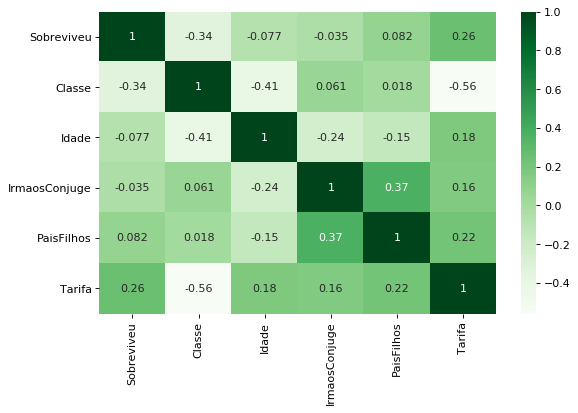

In [75]:
plt.figure(figsize=(8,5),dpi=80)
sns.heatmap(data.corr(), annot=True,cmap='Greens')
plt.show()

### Remover coluna "Sobreviveu"
Aparentemente não tem muita correlação com Idade, e está faltando bastante dados

In [77]:
data.drop('Sobreviveu',axis=1,inplace=True)

### Checar dados nulos

In [78]:
data.isnull().sum()

Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

# Engenharia de Recursos I

### Criar coluna "Titulo" baseando-se na coluna "Nome"

In [84]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [85]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [86]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [91]:
data['Titulo'] = data['Titulo'].apply(lambda x:'Outros' if x not in ['Miss','Master','Mr','Mrs']else x)

In [92]:
pd.crosstab(data['Titulo'],data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

In [98]:
data.loc[data['Titulo'] == 'Master'].max()

Classe                                           3
Nome             van Billiard, Master. Walter John
Sexo                                         homem
Idade                                         14.5
IrmaosConjuge                                    8
PaisFilhos                                       2
Bilhete                                 W./C. 6607
Tarifa                                     262.375
Embarque                                         S
Titulo                                      Master
dtype: object

In [99]:
titulos_traduzidos = {
    'Master':'Menino',
    'Miss':'Solteira',
    'Mr':'HomemAdulto',
    'Mrs':'Casada'
}

In [102]:
data['Titulo'] =  data['Titulo'].map(titulos_traduzidos)

### Averiguar informações do DataFrame

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Classe         1309 non-null   int64  
 1   Nome           1309 non-null   object 
 2   Sexo           1309 non-null   object 
 3   Idade          1046 non-null   float64
 4   IrmaosConjuge  1309 non-null   int64  
 5   PaisFilhos     1309 non-null   int64  
 6   Bilhete        1309 non-null   object 
 7   Tarifa         1309 non-null   float64
 8   Embarque       1309 non-null   object 
 9   Titulo         1275 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 152.5+ KB


### Remover "Bilhete" e "Nome"

In [104]:
data.drop(['Bilhete','Nome'],axis=1,inplace=True)

In [106]:
data.head(1)

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
1,3,homem,22.0,1,0,7.25,S,HomemAdulto


# Engenharia de Recursos II

### Estudar possibilidade de identificar "meninas" similar aos "meninos"
Através da combinação: "solteira" e está com "pais"

In [115]:
meninas = data.loc[(data['Titulo']=='Solteira') & (data['Idade']<=16)]
mulheres_solteiras = data.loc[(data['Titulo']=='Solteira') & (data['PaisFilhos']>=1)]

### idade média de "meninas solteiras acompanhadas dos pais"

In [138]:
mulheres_solteiras['Idade'].mean()

12.178815789473683

### verificar distribuição da idade

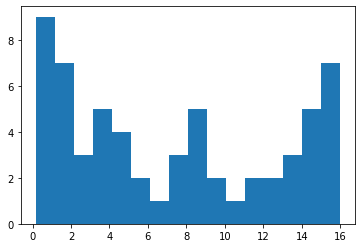

In [114]:
plt.hist(meninas['Idade'],bins=16)
plt.show()

### Média de mulheres "solteiras"

In [116]:
data.loc[data['Titulo']=='Solteira']['Idade'].mean()

21.774238095238097

### Distribuição das idades de mulheres "solteiras"

/home/vinicius/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/vinicius/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


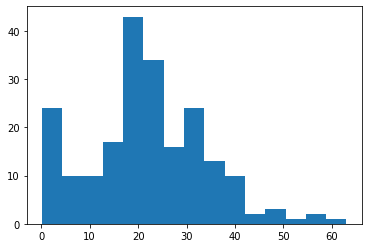

In [117]:
plt.hist(data.loc[data['Titulo']=='Solteira']['Idade'],bins=15)
plt.show()

### Média de idade de mulheres "casadas"

In [118]:
data.loc[data['Titulo']=='Casada']['Idade'].mean()

36.99411764705882

### Distribuição das idades de mulheres "casadas"

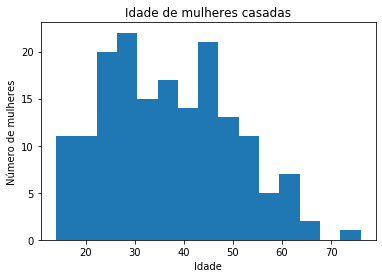

In [129]:
plt.hist(data.loc[data['Titulo']=='Casada']['Idade'],bins=15)
plt.title('Idade de mulheres casadas')
plt.xlabel('Idade')
plt.ylabel('Número de mulheres')
plt.show()

### Adicionar coluna "solteira com pais"

In [130]:
mulheres_solteiras.index

Int64Index([  11,   25,   44,   59,   69,   72,   89,  120,  129,  137,  148,
             173,  181,  185,  206,  230,  234,  238,  298,  312,  319,  330,
             342,  357,  375,  382,  410,  418,  420,  436,  437,  447,  449,
             470,  480,  486,  531,  536,  540,  541,  542,  543,  581,  586,
             594,  616,  619,  635,  643,  645,  652,  690,  692,  703,  721,
             743,  751,  793,  814,  836,  853,  854,  864,  889,  918,  944,
             945, 1009, 1017, 1032, 1067, 1078, 1080, 1095, 1106, 1130, 1142,
            1155, 1175, 1176, 1188, 1218, 1246, 1277, 1294, 1301],
           dtype='int64', name='PassengerId')

In [131]:
data['solteira_com_pais'] = 0

In [132]:
for idx,_ in data.iterrows():
    if idx in mulheres_solteiras.index:
        data['solteira_com_pais'].at[idx] = 1
        

In [137]:
data.loc[data['solteira_com_pais'] == 1]['Idade'].mean()

12.178815789473683

In [139]:
data.loc[data['solteira_com_pais'] == 0]['Idade'].mean()

31.26812371134021

### Transformar recursos categóricos em "dummies"

In [140]:
data.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteira_com_pais
PassengerId,,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,mulher,38.0,1,0,71.2833,C,Casada,0
3,3,mulher,26.0,0,0,7.9250,S,Solteira,0
4,1,mulher,35.0,1,0,53.1000,S,Casada,0
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto,0


In [141]:
data['Sexo'].replace({'homem':0,'mulher':1},inplace=True)

In [142]:
data.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteira_com_pais
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,1,38.0,1,0,71.2833,C,Casada,0
3,3,1,26.0,0,0,7.9250,S,Solteira,0
4,1,1,35.0,1,0,53.1000,S,Casada,0
5,3,0,35.0,0,0,8.0500,S,HomemAdulto,0


In [143]:
data = pd.get_dummies(data, columns=['Classe','Embarque','Titulo'],drop_first=True)

In [145]:
data.shape

(1309, 13)

### Separar train e test para idades
* treinar com dados não nulos
* aplicar modelo em dados nulos

In [146]:
data.isnull().sum()

Sexo                    0
Idade                 263
IrmaosConjuge           0
PaisFilhos              0
Tarifa                  0
solteira_com_pais       0
Classe_2                0
Classe_3                0
Embarque_Q              0
Embarque_S              0
Titulo_HomemAdulto      0
Titulo_Menino           0
Titulo_Solteira         0
dtype: int64

In [148]:
data.count()

Sexo                  1309
Idade                 1046
IrmaosConjuge         1309
PaisFilhos            1309
Tarifa                1309
solteira_com_pais     1309
Classe_2              1309
Classe_3              1309
Embarque_Q            1309
Embarque_S            1309
Titulo_HomemAdulto    1309
Titulo_Menino         1309
Titulo_Solteira       1309
dtype: int64

In [149]:
train_idade = data.dropna()

In [154]:
test_idade = data.loc[data['Idade'].isnull()].drop('Idade',axis=1)

In [156]:
train_idade.shape ,test_idade.shape

((1046, 13), (263, 12))

## Definir X e y para treinar o modelo

In [157]:
X = train_idade.drop('Idade',axis=1)

In [158]:
y = train_idade['Idade']

In [159]:
X.shape,y.shape

((1046, 12), (1046,))

### Importar modelo regressivo

In [160]:
from sklearn import linear_model

### Instanciar modelo

In [161]:
lm = linear_model.LinearRegression()

### Importar train_test_split para preparar para treino

In [162]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Treinar modelo

In [165]:
X_train.shape, y_train.shape

((732, 12), (732,))

In [166]:
X_test.shape,y_test.shape

((314, 12), (314,))

In [167]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Fazer predição

In [169]:
pred = lm.predict(X_test)
pred.shape

(314,)

### Importar mean_squared_error (erro quadrado médio)

In [170]:
from sklearn.metrics import mean_squared_error

### Averiguar score

In [172]:
lm.score(X_test,y_test)

0.4804827720523601

### Averiguar rmse

In [173]:
mse = mean_squared_error(y_test,pred)

In [177]:
rmse = np.sqrt(mse)
rmse
# rmse erro p/ cima ou p/ baixo (desvio padrao)

10.364464050317261

### Visualizar resíduos em scatterplot

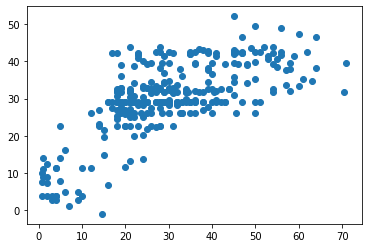

In [181]:
plt.scatter(y_test,pred)
plt.show()

<a name="tarifa"></a>

### Aplicar modelo nos dados nulos

In [182]:
test_idade.shape

(263, 12)

In [184]:
pred_idade = lm.predict(test_idade)

In [186]:
pred_idade.shape

(263,)

### Criar coluna Idade contendos as predições

In [187]:
test_idade['Idade'] = pred_idade

In [188]:
test_idade.isnull().sum()

Sexo                  0
IrmaosConjuge         0
PaisFilhos            0
Tarifa                0
solteira_com_pais     0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
Idade                 0
dtype: int64

### Averiguar shapes

In [190]:
test_idade.shape , train_idade.shape

((263, 13), (1046, 13))

### Concatenar dados

In [191]:
idade = pd.concat([train_idade,test_idade],sort=False)

### Criar DataFrame contendo "IdPassageiro" e "Idade"

In [192]:
idade.isnull().sum()

Sexo                  0
Idade                 0
IrmaosConjuge         0
PaisFilhos            0
Tarifa                0
solteira_com_pais     0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
dtype: int64

In [196]:
idade_completa = pd.DataFrame({'IdPassageiro':idade.index,'Idade':idade['Idade']})

In [197]:
idade_completa

,IdPassageiro,Idade
PassengerId,,
1,1,22.000000
2,2,38.000000
3,3,26.000000
4,4,35.000000
5,5,35.000000
...,...,...
1300,1300,25.165962
1302,1302,25.165698
1305,1305,29.084218


### Salvar CSV com idade completa

In [198]:
idade_completa.to_csv('idade_completa.csv',index=False)

In [199]:
data_idade = pd.read_csv('idade_completa.csv')

In [200]:
data_idade

,IdPassageiro,Idade
0,1,22.000000
1,2,38.000000
2,3,26.000000
3,4,35.000000
4,5,35.000000
...,...,...
1304,1300,25.165962
1305,1302,25.165698
1306,1305,29.084218
1307,1308,29.084218
